# Miniproyecto #3: Regresión logística capa One vs All


**Autores:**
*   Jorge Sebastián Arroyo Estrada CC. 1193482707
*   César Augusto Montoya Ocampo CC. 1036681523

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

## Librerías

Importa diversas bibliotecas para el análisis y procesamiento de datos, así como para la implementación y evaluación de modelos de aprendizaje automático. Se utilizan bibliotecas estándar como `json`, `pickle` y `datetime` para manejo de archivos y tiempos. `matplotlib`, `numpy` y `pandas` se emplean para visualización y manipulación de datos. Las métricas y herramientas de `sklearn` como `accuracy_score`, `f1_score`, y `confusion_matrix` se usan para evaluar el rendimiento de modelos, mientras que `GridSearchCV` y `train_test_split` facilitan la optimización y la partición de los datos. Además, se importa un clasificador que utiliza regresión logística (`LogisticRegression`) con el método de clasificación multiclase One vs Rest (`OneVsRestClassifier`) y un preprocesador (`StandardScaler`).

In [21]:
import json
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

from classification import main_pipeline, plot_grouped_metrics

## Globales

In [22]:
# Database files paths
DB_BASE_PATH = Path("../02_features/")
RESOLUTIONS = 2 * [64, 128]
DB_NAMES = [
    f"DB {RESOLUTIONS[i]}×{RESOLUTIONS[i]}{' PCA' if i >= 2 else ''}" for i in range(4)
]
DB_PATHS = [
    DB_BASE_PATH / f"{'features' if i < 2 else 'pca'}_{RESOLUTIONS[i]}.csv"
    for i in range(4)
]
DB_DICT = {name: path for name, path in zip(DB_NAMES, DB_PATHS)}

# Classes to labels mapping file path
LABELS_PATH = DB_BASE_PATH / "labels.csv"

# Results folder
RESULTS_FOLDER = Path("./ovr_results/")
RESULTS_FOLDER.mkdir(parents=True, exist_ok=True)

In [23]:
# Global parameters
RANDOM_STATE = 15
K = 5
ESTIMATOR = OneVsRestClassifier(LogisticRegression(random_state=RANDOM_STATE))
PARAM_GRID = {
    "estimator__C": [0.1, 1, 10, 100],
}
SCORE_METRICS = {
    "accuracy": make_scorer(accuracy_score),
    "precision_weighted": make_scorer(precision_score, average="weighted"),
    "recall_weighted": make_scorer(recall_score, average="weighted"),
    "f1_weighted": make_scorer(f1_score, average="weighted"),
}
MAIN_SCORE_METRIC = list(SCORE_METRICS.keys())[-1]

## One vs All

Este código define varias funciones para manejar el procesamiento de datos, entrenamiento de modelos y almacenamiento de resultados:

- `load_and_preprocess_data`: Carga un archivo CSV, separa las características y las etiquetas, y normaliza las características utilizando `StandardScaler`.
- `load_label_mapping`: Carga un archivo CSV con etiquetas de clases y devuelve un diccionario que mapea los números de clase a nombres legibles.
- `load_results`: Carga los resultados previamente guardados de un experimento, incluyendo el mejor modelo entrenado, métricas de entrenamiento, validación y prueba, y el tiempo de inferencia. Retorna `None` si no se encuentran los archivos o si ocurre un error.
- `save_results`: Guarda los resultados de un experimento en disco, incluyendo las métricas de evaluación, el tiempo de inferencia y el mejor modelo entrenado en formatos JSON y pickle.
- `grid_search_cv`: Realiza una búsqueda en cuadrícula para optimizar los hiperparámetros de un modelo de aprendizaje automático, utilizando validación cruzada y varias métricas de evaluación. Retorna el mejor modelo, las métricas de entrenamiento y validación promedio, y el tiempo de inferencia.
- `evaluate_model`: Evalúa el rendimiento de un modelo calculando métricas como precisión, recall, F1 y exactitud sobre las etiquetas verdaderas y predichas.

Funciones misceláneas para mostrar los resultados en pantalla de manera ordenada:
- `print_results`: Muestra de forma estructurada las métricas de evaluación del modelo para los conjuntos de entrenamiento, validación y prueba, formateándolas como porcentajes. También imprime el tiempo total de inferencia.
- `plot_metrics`: Genera un gráfico de barras que representa las métricas de evaluación del modelo en porcentajes, con el objetivo de visualizar el desempeño de manera clara y comprensible.
- `plot_confusion_matrix`: Crea y visualiza una matriz de confusión basada en las etiquetas reales y predichas, permitiendo identificar patrones de errores en las predicciones del modelo.

El código principal que carga y preprocesa los datos desde un archivo CSV, estandariza las características y obtiene un mapeo de etiquetas (1). Luego divide los datos en conjuntos de entrenamiento y prueba, reservando un 20% para este último (2). Intenta cargar resultados previos para evitar cálculos redundantes (3). Si no existen, realiza una búsqueda de hiperparámetros mediante validación cruzada para encontrar el mejor modelo (4). Posteriormente, evalúa el modelo en el conjunto de prueba, calcula métricas clave, imprime los resultados e informa sobre el tiempo de inferencia (5). Si los resultados son nuevos, los guarda y genera visualizaciones como gráficos de métricas y matrices de confusión (6). Finalmente, retorna las métricas calculadas para entrenamiento, validación y prueba (7).

## Aplicar One vs All

Ejecución de todo el código para cada una de las bases de datos disponibles, para ambas resoluciones y cuando se empleó PCA o no para la reducción de dimensionalidad.

Trying to read previous results for DB 64×64

Train Set Evaluation Metrics:
  Accuracy: 99.7671%
  Precision weighted: 99.7686%
  Recall weighted: 99.7671%
  F1 weighted: 99.7665%

Validation Set Evaluation Metrics:
  Accuracy: 95.1364%
  Precision weighted: 95.1699%
  Recall weighted: 95.1364%
  F1 weighted: 95.1200%

Test Set Evaluation Metrics:
  Accuracy: 94.9640%
  Precision: 94.9786%
  Recall: 94.9640%
  F1 score: 94.9596%

Inference time: 0:00:04.267443


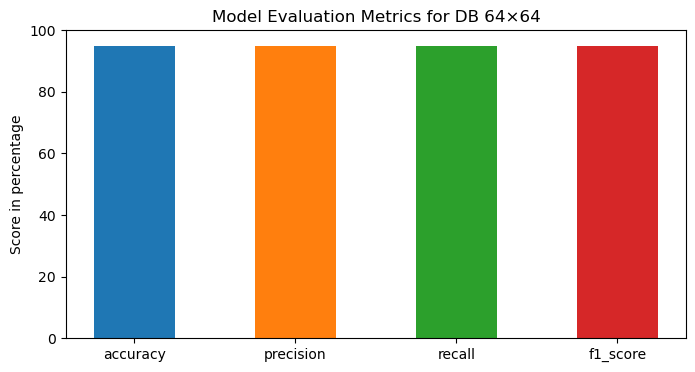

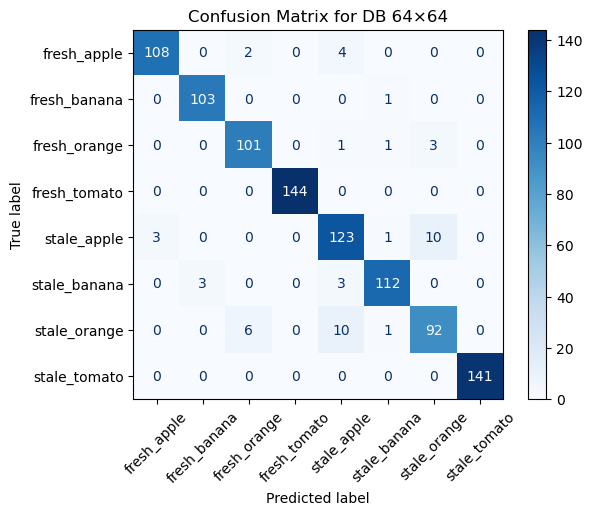

Trying to read previous results for DB 128×128

Train Set Evaluation Metrics:
  Accuracy: 100.0000%
  Precision weighted: 100.0000%
  Recall weighted: 100.0000%
  F1 weighted: 100.0000%

Validation Set Evaluation Metrics:
  Accuracy: 94.0891%
  Precision weighted: 94.1255%
  Recall weighted: 94.0891%
  F1 weighted: 94.0780%

Test Set Evaluation Metrics:
  Accuracy: 95.5807%
  Precision: 95.6252%
  Recall: 95.5807%
  F1 score: 95.5902%

Inference time: 0:00:19.307798


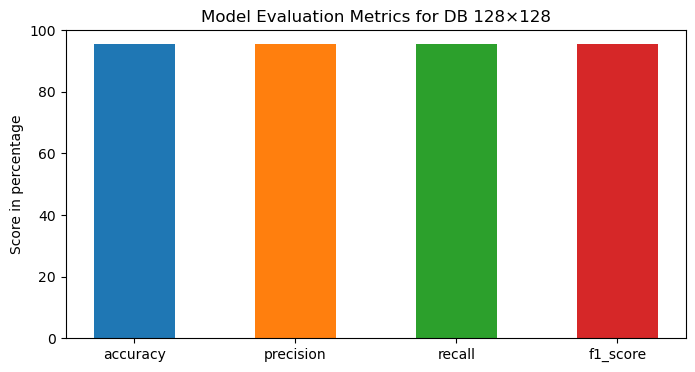

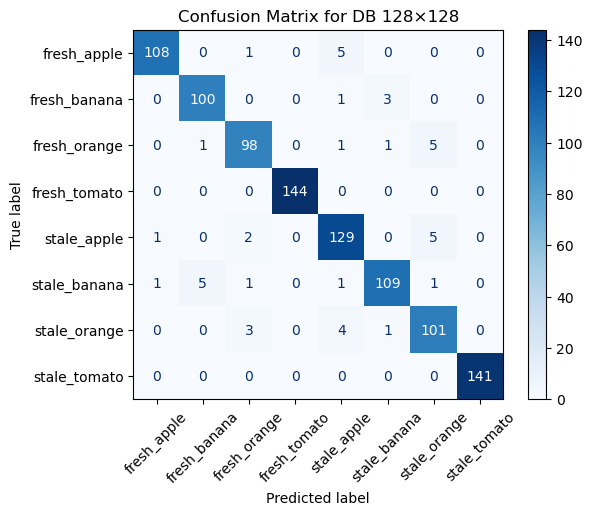

Trying to read previous results for DB 64×64 PCA

Train Set Evaluation Metrics:
  Accuracy: 61.9121%
  Precision weighted: 63.5060%
  Recall weighted: 61.9121%
  F1 weighted: 61.7166%

Validation Set Evaluation Metrics:
  Accuracy: 61.6415%
  Precision weighted: 63.6386%
  Recall weighted: 61.6415%
  F1 weighted: 61.5024%

Test Set Evaluation Metrics:
  Accuracy: 59.8150%
  Precision: 61.3188%
  Recall: 59.8150%
  F1 score: 59.2805%

Inference time: 0:00:00.873174


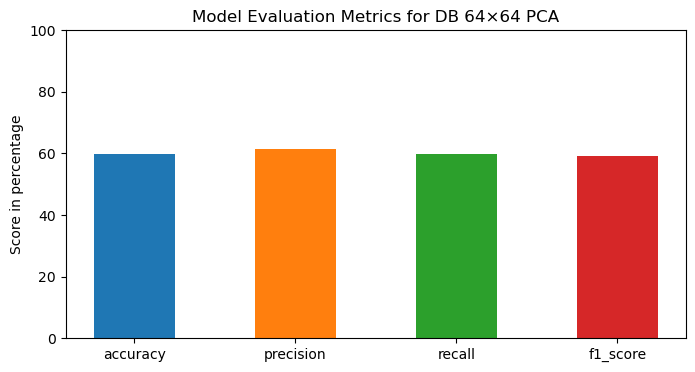

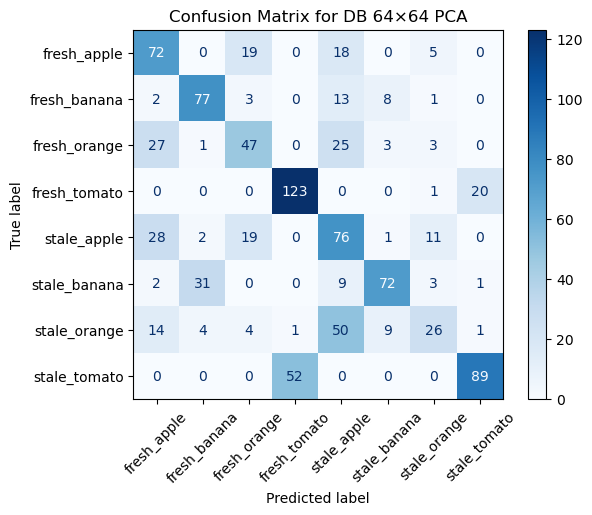

Trying to read previous results for DB 128×128 PCA

Train Set Evaluation Metrics:
  Accuracy: 46.9770%
  Precision weighted: 46.8609%
  Recall weighted: 46.9770%
  F1 weighted: 45.6639%

Validation Set Evaluation Metrics:
  Accuracy: 46.0677%
  Precision weighted: 45.9688%
  Recall weighted: 46.0677%
  F1 weighted: 44.6580%

Test Set Evaluation Metrics:
  Accuracy: 45.4265%
  Precision: 44.6069%
  Recall: 45.4265%
  F1 score: 43.9281%

Inference time: 0:00:00.756439


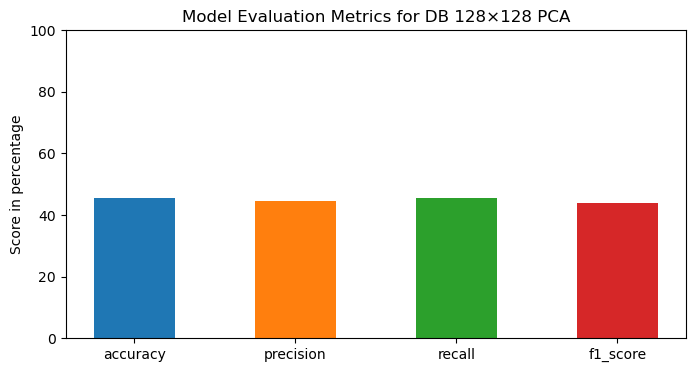

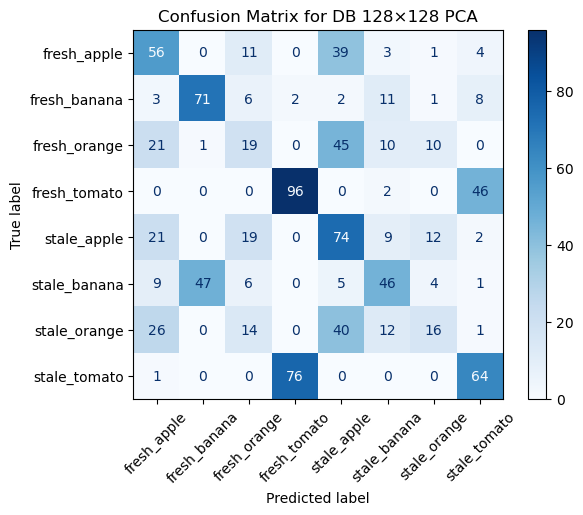

In [24]:
test_scores = {}
for name, path in DB_DICT.items():
    _, _, test_score = main_pipeline(
        name,
        path,
        LABELS_PATH,
        RESULTS_FOLDER,
        RANDOM_STATE,
        ESTIMATOR,
        PARAM_GRID,
        K,
        SCORE_METRICS,
        MAIN_SCORE_METRIC,
    )
    test_scores[name] = test_score

Graficar todas las métricas de prueba para cada una de las bases de datos, para así poder ver gráficamente cuál de las bases de datos nos entregó un mejor resultado.

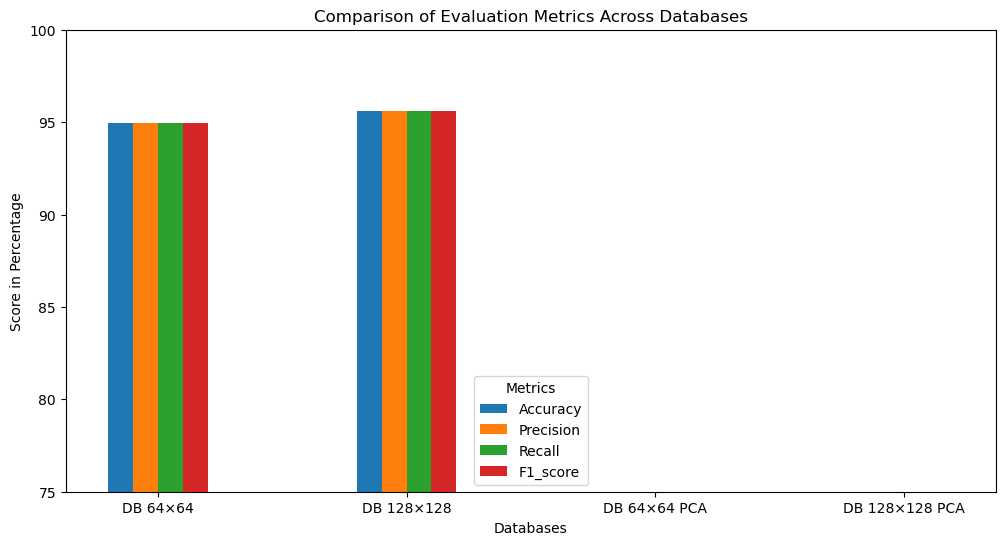

In [25]:
plot_grouped_metrics(test_scores)